In [1]:
# Stiff Robertson's problem from chemical kinetics as in
# https://archimede.uniba.it/~testset/report/rober.pdf
import numpy as np
import matplotlib.pyplot as plt
import time

a = 0.04
b = 1.0e4
c = 3.0e7

# timestep, Tmax, tolearnce for Newton's solver
h = 1.0e-3
Tmax = 1.0e2 # up to 4.0e10
Nsteps = int(np.ceil(Tmax/h))
tol = 1.0e-14
itermax = 20

# initial condition
y0 = np.array([1.0,0.0,0.0])

# the right-hand side
def func(y): 
    dy = np.zeros(3)
    byz = b*y[1]*y[2]
    cy2 = c*y[1]*y[1]
    ax = a*y[0]
    dy[0] = -ax + byz
    dy[1] = ax - byz - cy2
    dy[2] = cy2
    return dy

# the Jacobian matrix for the right-hand side
def Jac(y):
    by = b*y[1]
    bz = b*y[2]
    c2y = 2*c*y[1]
    Jac = np.zeros((3,3))
    Jac[0,0] = -a
    Jac[0,1] = bz
    Jac[0,2] = by
    Jac[1,0] = a
    Jac[1,1] = -bz-c2y
    Jac[1,2] = -by
    Jac[2,1] = c2y
    return Jac


In [2]:
# DIRo3

def NewtonIterDIRK3(y, h, k, gamma):
    aux = y + h * gamma * k
    F = k - func(aux)
    DF = np.identity(3) - h * gamma * Jac(aux)
    return k - np.linalg.solve(DF, F)

def DIRKo3step(y, h):
    gamma = 1/2 + np.sqrt(3)/6
    # stage 1
    k1 = func(y)
    for j in range(itermax):
        k1 = NewtonIterDIRK3(y,h,k1,gamma)
        if np.linalg.norm(k1 - func(y + h*gamma*k1)) < tol:
            break
    
    # stage 2
    k2 = k1
    y = y + h*(1-2*gamma)*k1
    for j in range(itermax):
        k2 = NewtonIterDIRK3(y,h,k2,gamma)
        aux = (y - h*(1-2*gamma)*k1) + h*(k1/2 + k2/2)
        if np.linalg.norm(k2 - func(aux)) < tol:
            break
    # print( np.linalg.norm(k2 - func(aux)))
    # print(j)
        
    return aux

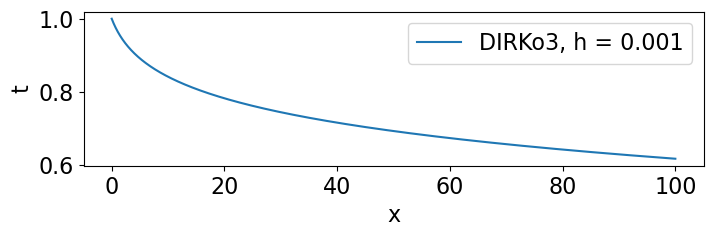

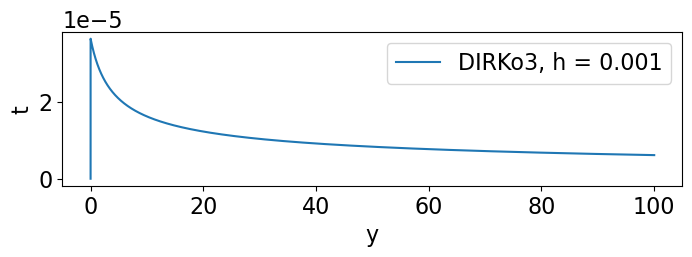

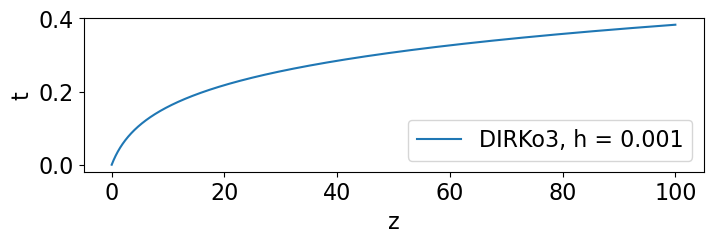

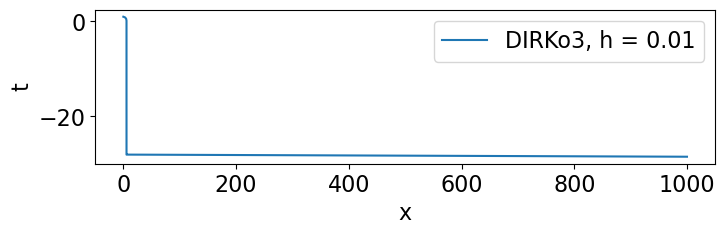

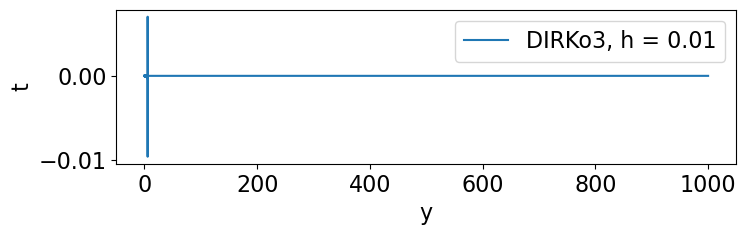

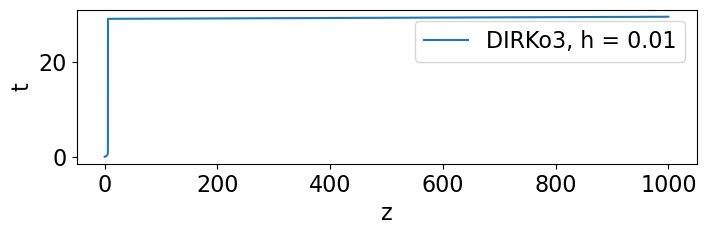

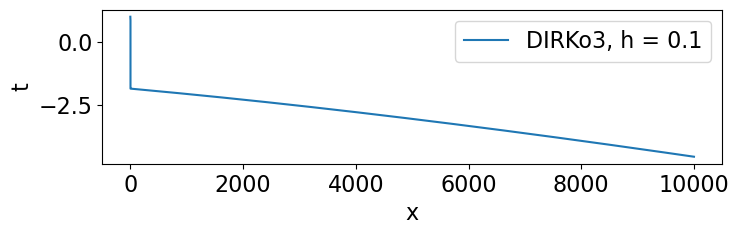

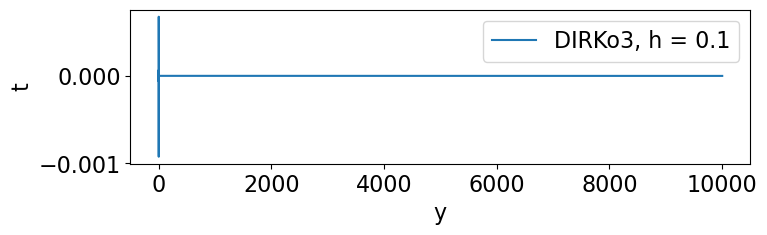

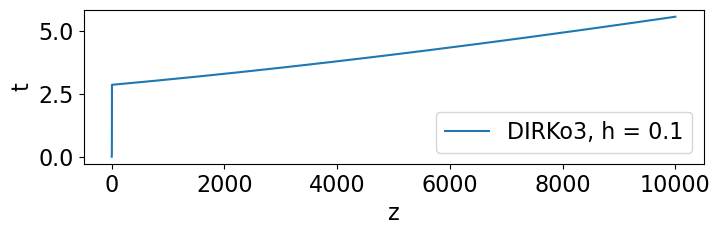

In [3]:
# solve Robertson's problem with DIRKo3 for h = 10^-3, 10^-2, 10^-1

hs = [10**-3, 10**-2, 10**-1]

CPUtime_DIRKo3 = []

plt.rcParams.update({'font.size': 16})
for h in hs:
    sol = np.zeros((Nsteps+1,3))
    t = np.arange(0,(Nsteps+1)*h,h)
    sol[0,:] = y0
    start_time = time.time()
    for j in range(Nsteps):
        sol[j+1,:] = DIRKo3step(sol[j,:],h)
    end_time = time.time()
    t_cpu = end_time - start_time
    CPUtime_DIRKo3.append(t_cpu)
    # plot the solution fro each h
    fig, ax = plt.subplots(figsize = (8,2))
    plt.plot(t,sol[:,0],label = f"DIRKo3, h = {h}")
    plt.xlabel("x")
    plt.ylabel("t")
    plt.legend()
    #plt.xscale("log")
    fig, ax = plt.subplots(figsize = (8,2))
    plt.plot(t,sol[:,1],label = f"DIRKo3, h = {h}")
    plt.xlabel("y")
    plt.ylabel("t")
    plt.legend()
    #plt.xscale("log")
    fig, ax = plt.subplots(figsize = (8,2))
    plt.plot(t,sol[:,2],label = f"DIRKo3, h = {h}")
    plt.xlabel("z")
    plt.ylabel("t")
    plt.legend()
    #plt.xscale("log")

In [4]:
# DIRK2

def NewtonIterDIRK2(y,h,k,gamma):
    aux = y + h*gamma*k
    F = k - func(aux)
    DF = np.identity(3) - h*gamma*Jac(aux)
    return k - np.linalg.solve(DF,F)

def DIRK2step(y,h):
    gamma = 1.0 - 1.0/np.sqrt(2)
    k1 = func(y)
    for j in range(itermax):
        k1 = NewtonIterDIRK2(y,h,k1,gamma)
        if np.linalg.norm(k1 - func(y + h*gamma*k1)) < tol:
            break
    # print( np.linalg.norm(k1 - func(y + h*gamma*k1)))
    # print(j)
    k2 = k1
    y = y + h*(1-gamma)*k1
    for j in range(itermax):
        k2 = NewtonIterDIRK2(y,h,k2,gamma)
        aux = y + h*gamma*k2
        if np.linalg.norm(k2 - func(aux)) < tol:
            break
    # print( np.linalg.norm(k2 - func(aux)))
    # print(j)
    return aux

    


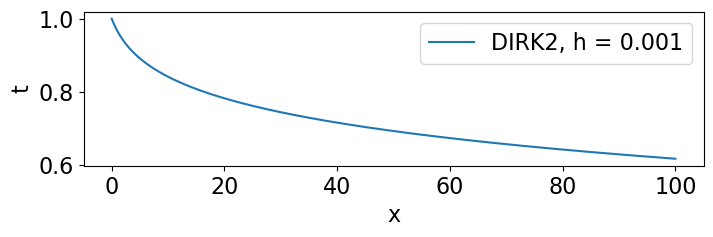

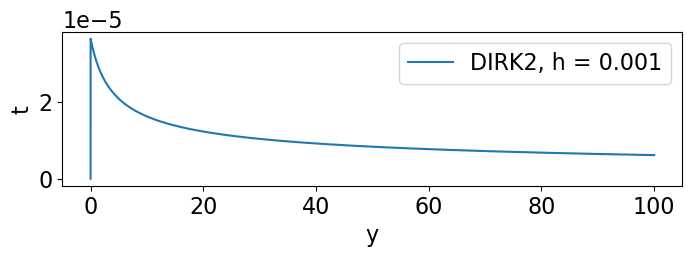

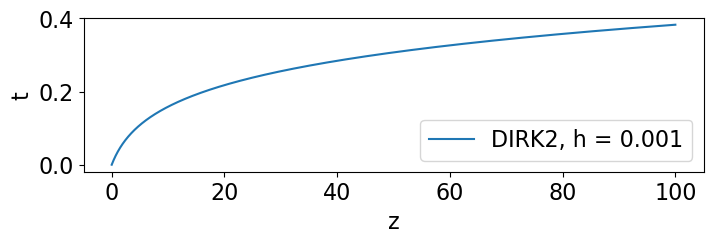

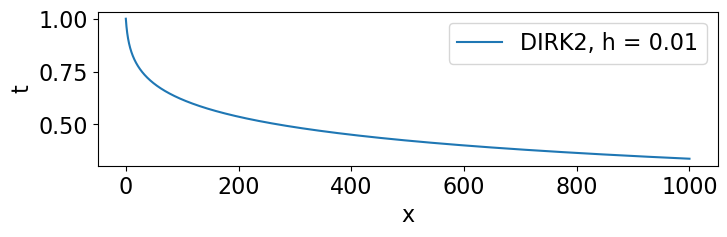

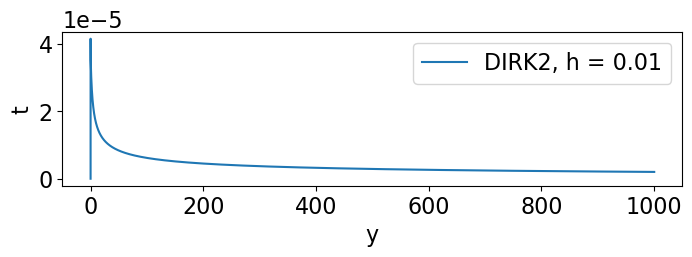

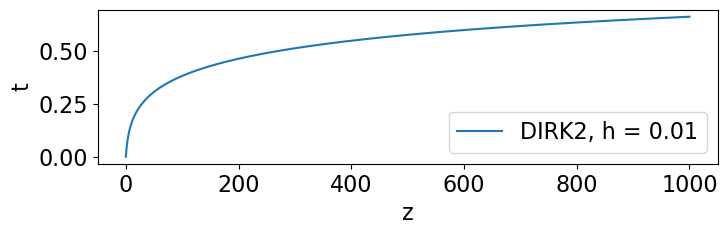

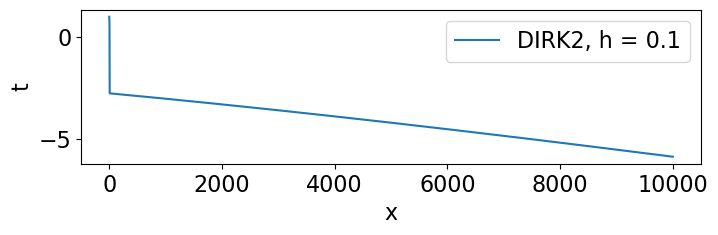

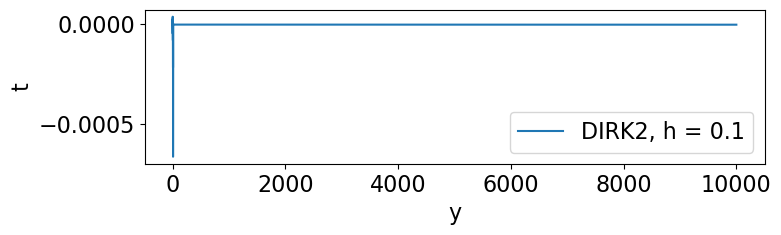

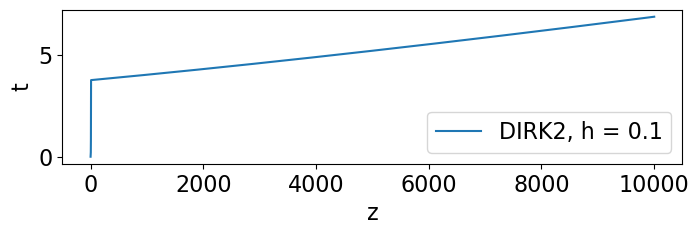

In [5]:
# solve Robertson's problem with DIRK2 for h = 10^-3, 10^-2, 10^-1

hs = [10**-3, 10**-2, 10**-1]

CPUtime_DIRK2 = []

plt.rcParams.update({'font.size': 16})
for h in hs:
    sol = np.zeros((Nsteps+1,3))
    t = np.arange(0,(Nsteps+1)*h,h)
    sol[0,:] = y0
    start_time = time.time()
    for j in range(Nsteps):
        sol[j+1,:] = DIRK2step(sol[j,:],h)
    end_time = time.time()
    t_cpu = end_time - start_time
    CPUtime_DIRK2.append(t_cpu)
    # plot the solution fro each h
    fig, ax = plt.subplots(figsize = (8,2))
    plt.plot(t,sol[:,0],label = f"DIRK2, h = {h}")
    plt.xlabel("x")
    plt.ylabel("t")
    plt.legend()
    #plt.xscale("log")
    fig, ax = plt.subplots(figsize = (8,2))
    plt.plot(t,sol[:,1],label = f"DIRK2, h = {h}")
    plt.xlabel("y")
    plt.ylabel("t")
    plt.legend()
    #plt.xscale("log")
    fig, ax = plt.subplots(figsize = (8,2))
    plt.plot(t,sol[:,2],label = f"DIRK2, h = {h}")
    plt.xlabel("z")
    plt.ylabel("t")
    plt.legend()
    #plt.xscale("log")


In [6]:
# BDF with DIRK2
# y_{n+1}-{\tfrac {4}{3}}y_{n}+{\tfrac {1}{3}}y_{n - 1}={\tfrac {2}{3}}hf(t_{n+1},y_{n+1}
def NewtonIterBDF2(y_n, y_prev, h, unew):
    for j in range(itermax):
        F = unew - 4/3*y_n + 1/3*y_prev - 2/3*h*func(unew)
        DF = np.identity(len(y_n)) - 2/3*h*Jac(unew)
        delta = np.linalg.solve(DF, F)
        unew = unew - delta
        if np.linalg.norm(delta) < tol:
            break
    return unew
def BDF2step(y,y_prev,h):
    unew = y+h*func(y)
    for j in range(itermax):
        unew = NewtonIterBDF2(y,y_prev,h,unew)
        residual = unew - 4/3*y + 1/3*y_prev + 2/3*h*func(unew)
        if np.linalg.norm(residual) < tol:
            break
            
    return unew

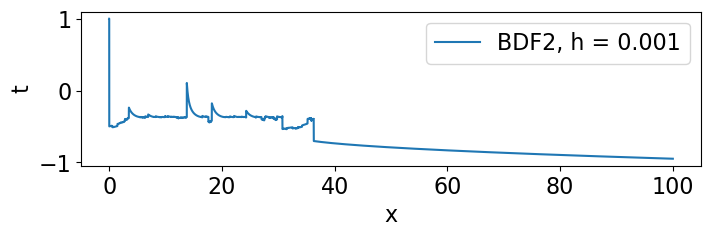

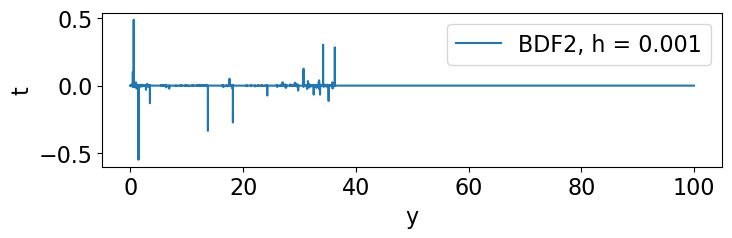

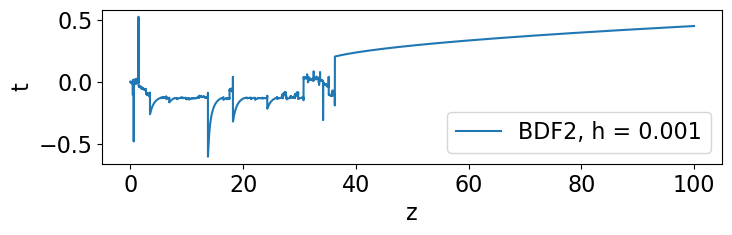

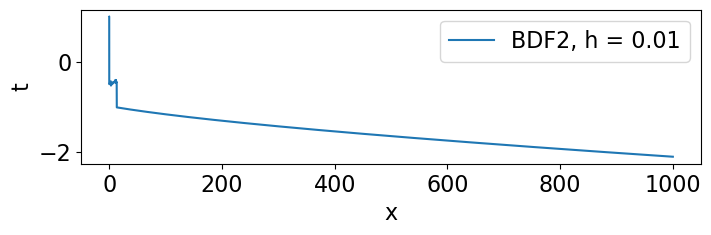

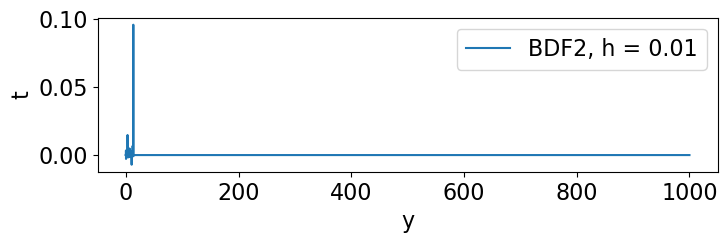

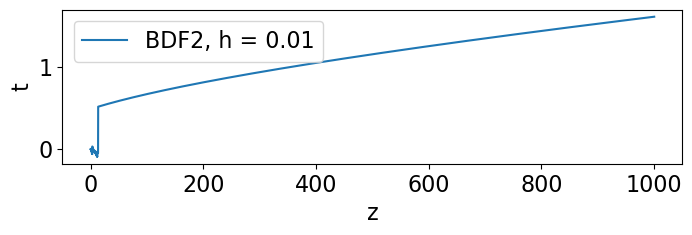

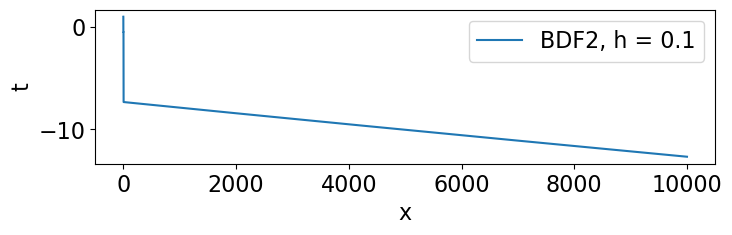

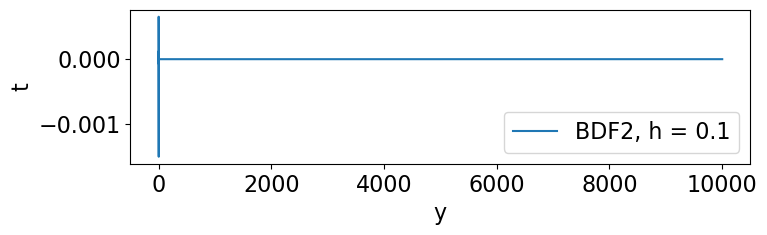

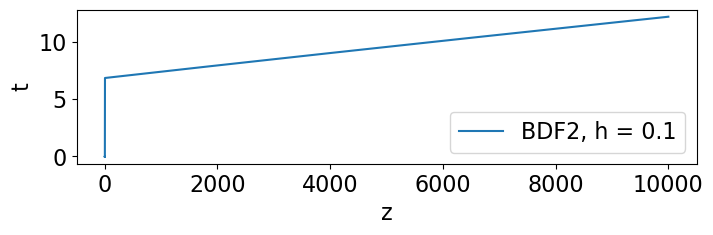

In [7]:
# solve Robertson's problem with BDF2 for h = 10^-3, 10^-2, 10^-1

hs = [10**-3, 10**-2, 10**-1]

CPUtime_BDF2 = []

plt.rcParams.update({'font.size': 16})
for h in hs:
    sol = np.zeros((Nsteps+1,3))
    t = np.arange(0,(Nsteps+1)*h,h)
    sol[0,:] = y0
    sol[1,:] = DIRK2step(y0, h)
    start_time = time.time()
    for j in range(2, Nsteps):
        sol[j+1,:] = BDF2step(sol[j,:], sol[j-1,:],h)
    end_time = time.time()
    t_cpu = end_time - start_time
    CPUtime_BDF2.append(t_cpu)
    # plot the solution for each h
    fig, ax = plt.subplots(figsize = (8,2))
    plt.plot(t,sol[:,0],label = f"BDF2, h = {h}")
    plt.xlabel("x")
    plt.ylabel("t")
    plt.legend()
    #plt.xscale("log")
    fig, ax = plt.subplots(figsize = (8,2))
    plt.plot(t,sol[:,1],label = f"BDF2, h = {h}")
    plt.xlabel("y")
    plt.ylabel("t")
    plt.legend()
    #plt.xscale("log")
    fig, ax = plt.subplots(figsize = (8,2))
    plt.plot(t,sol[:,2],label = f"BDF2, h = {h}")
    plt.xlabel("z")
    plt.ylabel("t")
    plt.legend()
    #plt.xscale("log")

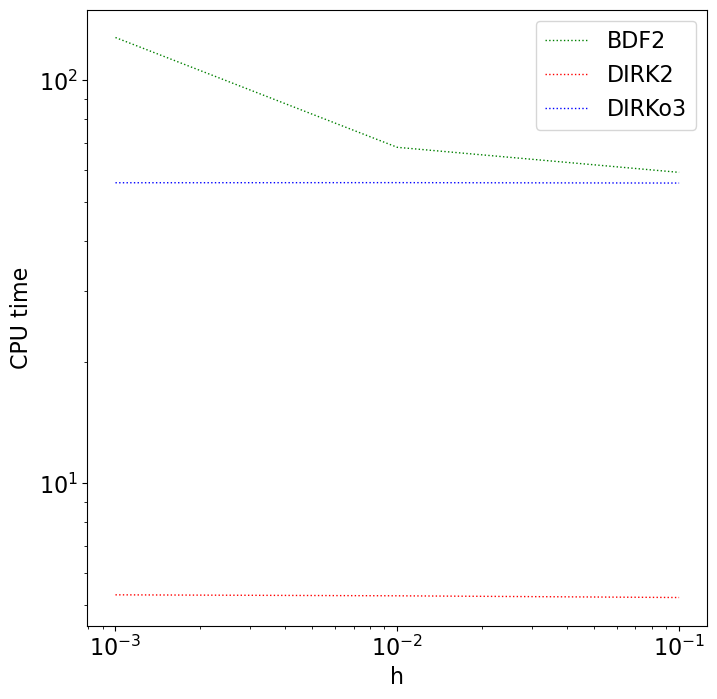

In [8]:
# plot the CPU time v.s h in logscale
CPUTimes = [CPUtime_BDF2, CPUtime_DIRK2, CPUtime_DIRKo3]
fig, ax = plt.subplots(figsize=(8,8))
colors = ['g', 'r', 'b']
for index, CPUtime in enumerate(CPUTimes):
    plt.plot(hs, CPUtime,linestyle = 'dotted',color=colors[index], linewidth=1 )

plt.xlabel("h")
plt.ylabel("CPU time")
plt.xscale('log')
plt.yscale('log')
plt.legend(['BDF2','DIRK2','DIRKo3'])

In [9]:
# # plot the solution for DIRK2, DIRKo3, BDF
# plt.rcParams.update({'font.size': 12})
# fig, ax = plt.subplots(3,3,figsize = (12,4))

# solvers = ['DIRK2step', 'DIRKo3step', 'BDF2step']
# solvers_dict = {
#     'DIRK2step': DIRK2step,
#     'DIRKo3step': DIRKo3step,
#     'BDF2step': BDF2step
# }
# hs = [10**-3, 10**-2, 10**-1]
# CPUTimes = [] # 3*3 array, each row represents the same solver
# for solver_ind, solver in enumerate(solvers):
#     CPUTtime_crt = []
#     solver_func = solvers_dict[solver]
#     for h_ind, h in enumerate(hs):

#         # solve Robertson's problem

#         sol = np.zeros((Nsteps+1,3))
#         t = np.arange(0,(Nsteps+1)*h,h)
#         sol[0,:] = y0
#         start_time = time.time()
#         if solver == 'BDF2step':
#             sol[1,:] = DIRK2step(y0, h)
#             for j in range(2, Nsteps):
#                 sol[j+1,:] = solver_func(sol[j,:], sol[j-1,:],h)
#         else:
#             for j in range(1, Nsteps):
#                 sol[j+1,:] = solver_func(sol[j,:],h)

#         end_time = time.time()
#         t_cpu = end_time - start_time
#         CPUTtime_crt.append(t_cpu)

#         #draw pics:
#         ax[solver_ind, h_ind].plot(t, sol[:,0])
#         ax[solver_ind, h_ind].set_title(f'method {solver} with h {h}')
#         ax[solver_ind, h_ind].set_xlabel('t')
#         ax[solver_ind, h_ind].set_ylabel('y')
#     CPUTimes.append(CPUTtime_crt)

# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.8)
# # plot the CPU time v.s h in logscale
# fig, ax = plt.subplots(figsize=(8,8))
# colors = ['g', 'r', 'b']
# for index, CPUtime in enumerate(CPUTimes):
#     plt.plot(hs, CPUtime,linestyle = 'dotted',color=colors[index], linewidth=1 )

# plt.xlabel("h")
# plt.ylabel("CPU time")
# plt.xscale('log')
# plt.yscale('log')
# plt.legend(['DIRK2','DIRKo3','BDF'])


In [10]:
# Q3
from math import sin, cos, pi, exp
import numpy as np
import matplotlib.pyplot as plt
# parameter setting

L = 10^4
phi_func = lambda t: sin(t + pi/4)
d_pho_func = lambda t: cos(t + pi/4)

Tmax = 10
gamma = 1.0 - 1.0/np.sqrt(2)
def DIRK2(t, u, h):
    k1 = (-L * (u - phi_func(t + gamma * h)) + d_pho_func(t + gamma * h))/(1 + gamma * h * L)
    k2 = (-L *(u + (1 - gamma) * h * k1 - phi_func(t + h)) + d_pho_func(t + h))/(1 + gamma * h * L)
    u = u + h * (1 - gamma) * k1 + h * gamma * k2

    return u

def DIRK3(t, u, h):

    k1 = (-L * (u - phi_func(t + gamma * h)) + d_pho_func(t + gamma * h))/(1 + gamma * h * L)
    k2 = (-L *(u + (1 - 2 * gamma) * h * k1 - phi_func(t + (1 - gamma) * h)) + d_pho_func(t + (1 - gamma) * h))/(1 + gamma * h * L)
    u = u + h * k1/2 + h * k2/2

    return u

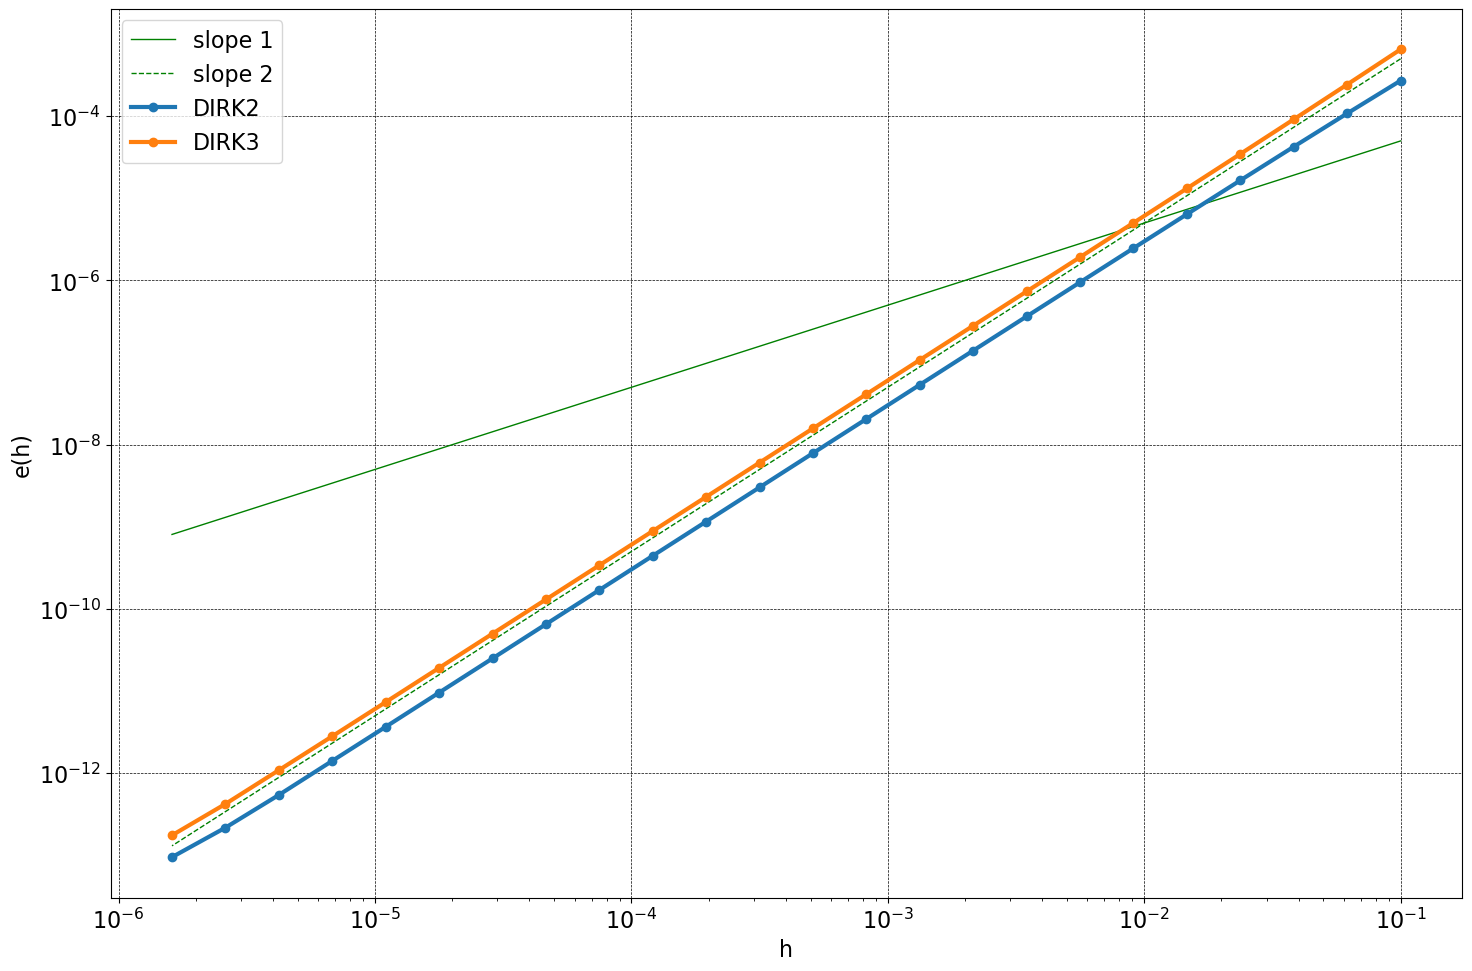

In [11]:
y0 = sin(pi/4)

hs = 10 ** (-np.arange(1,6,5/24))

y = lambda t: exp(-L*t)*(y0 - phi_func(0)) + phi_func(t)

err2 = []
err3 = []

for h in hs:
    times = np.arange(0, Tmax, h)
    y_exc = [y(t) for t in times]
    y_app2 = [y0]
    y_app3 = [y0]
    for i in range(len(times)):
        y_app2.append(DIRK2(times[i], y_app2[-1], h))
        y_app3.append(DIRK3(times[i], y_app3[-1], h))
    err2.append(max([abs(y_app2[i]-y_exc[i]) for i in range(len(times))]))
    err3.append(max([abs(y_app3[i]-y_exc[i]) for i in range(len(times))]))


# plot e(h)
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(15, 10))
plt.plot(hs, [.0005*h for h in hs],linestyle = '-',color='g', linewidth=1)  # error decay c_1*h
plt.plot(hs, [.05*h**2 for h in hs],linestyle = '--',color='g', linewidth=1) # error decay c_2*h^2
plt.plot(hs,err2, 'o-', linewidth=3)
plt.plot(hs,err3, 'o-', linewidth=3)
plt.xlabel("h")
plt.ylabel("e(h)")
plt.xscale('log')
plt.yscale('log')
plt.legend(['slope 1','slope 2','DIRK2','DIRK3'])
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.tight_layout()


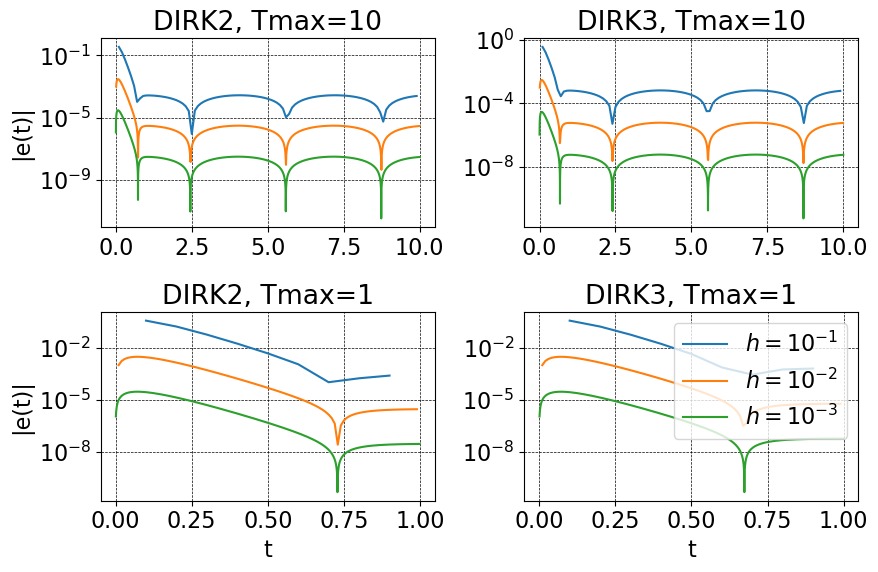

In [12]:
# Q3 (b)

y0 = sin(pi/4) + 10

err2 = []
err3 = []

fit, ax = plt.subplots(2,2, figsize=(9,6))
for h in [10**-1, 10**-2, 10**-3]:
    for Tmax_int, Tmax in enumerate([10, 1]):
        times = np.arange(0, Tmax, h)
        y_exc = [y(t) for t in times]
        y_app2 = [y0]
        y_app3 = [y0]
        for i in range(len(times) -1):
            y_app2.append(DIRK2(times[i], y_app2[-1], h))
            y_app3.append(DIRK3(times[i], y_app3[-1], h))
        err2 = np.abs(np.array(y_exc) - np.array(y_app2))
        ax[Tmax_int, 0].plot(times[1:], err2[1:])
        err3 = np.abs(np.array(y_exc) - np.array(y_app3))
        ax[Tmax_int, 1].plot(times[1:], err3[1:])


# plot e(h)
plt.rcParams.update({'font.size': 16})
ax[0,0].set_title('DIRK2, Tmax=10')
ax[0,1].set_title('DIRK3, Tmax=10')
ax[1,0].set_title('DIRK2, Tmax=1')
ax[1,1].set_title('DIRK3, Tmax=1')
ax[1,1].legend([r'$h=10^{-1}$',r'$h=10^{-2}$',r'$h=10^{-3}$'])
for (i,j) in [(0,0),(0,1),(1,0),(1,1)]:
    ax[i,j].set_yscale('log')
    ax[i,0].set_ylabel('|e(t)|')
    ax[1,j].set_xlabel('t')
    ax[i,j].grid(color='k', linestyle='--', linewidth=0.5)
plt.tight_layout()